In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [19]:
sample = mnist.train.images[123].reshape(28,28)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

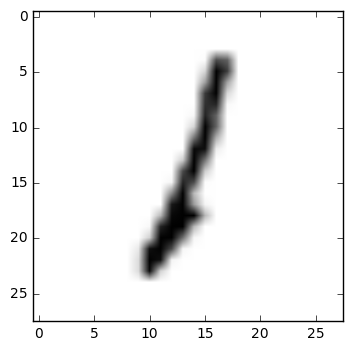

In [20]:
plt.imshow(sample, cmap='Greys')

In [21]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [23]:
n_classes = 10
n_samples = mnist.train.num_examples

In [25]:
n_input = 784

In [27]:
n_hidden_1 = 256
n_hidden_2 = 256

In [29]:
def multilayer_perceptron(x,weights, biases):
    '''
    x: placeholder for data input
    weights: dict of weights
    biases: dict of bias values
    '''
    
    # Fiest HIdden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    #Func(X * W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer

In [32]:
weights = {
    'h1' :tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' :tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [33]:
weights

{'h1': <tensorflow.python.ops.variables.Variable at 0x127cabc90>,
 'h2': <tensorflow.python.ops.variables.Variable at 0x127b21c90>,
 'out': <tensorflow.python.ops.variables.Variable at 0x127afb6d0>}

In [34]:
biases = {
    'b1' :tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' :tf.Variable(tf.random_normal([ n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([n_classes]))
}

In [35]:
biases

{'b1': <tensorflow.python.ops.variables.Variable at 0x127d9aed0>,
 'b2': <tensorflow.python.ops.variables.Variable at 0x1114ea050>,
 'out': <tensorflow.python.ops.variables.Variable at 0x127dad790>}

In [36]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None,n_classes])

In [39]:
pred = multilayer_perceptron(x, weights, biases)

In [40]:
tf.nn.softmax_cross_entropy_with_logits
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)